# Aula 14/03/2022 - Aprendizado supervisionado - Reconhecendo Números

Vamos importar uma base de imagens de números escritos a mão. Utilizando técnicas de machine learning, vamos criar um modelo para identificar números escritos a mão, que não estavam na base.

In [1]:
# Vamos tentar fazer juntos? Se no laboratório não estiver rodando o python, vamos 
# tentar usar o binder.
# É só acessar o link https://jupyter.org/try

In [2]:
# Existem várias bases desse tipo disponíveis na rede. Vamos usar uma disponível no sklearn
# Importando base load_digits
# Mais detalhes sobre a base podem ser encontrados aqui

from sklearn.datasets import load_digits

In [3]:
# Vou carregar as imagens no objeto digitosCarregados

digitosCarregados = load_digits()

In [4]:
# Vamos ver quantas instâncias e quantos atributos tem nesse dataset

digitosCarregados.data.shape

(1797, 64)

In [5]:
# Para ter uma ideia mais clara das imagens, vamos exibir algumas
# Para isso, vamos importar e usar a biblioteca matpltlib

import matplotlib.pyplot as plt

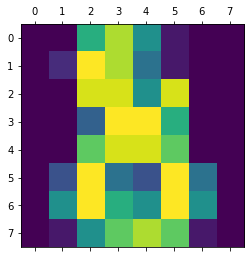

In [9]:
# Vamos exibir uma das imagens para ter uma ideia de como está armazenado

plt.matshow(digitosCarregados.images[1796])

In [10]:
# Podemos tratar as imagens com cores, mas se o objetivo é 
# simplesmente identificar o número, podemos usar uma escala de cinza. Para isso, fazemos:
# Colocando em escala de cinza

plt.gray()

<Figure size 432x288 with 0 Axes>

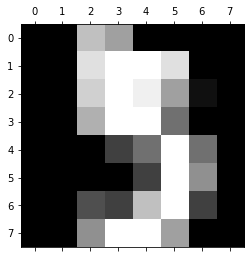

In [11]:
# Exibindo o gráfico

plt.matshow(digitosCarregados.images[5])

<Figure size 432x288 with 0 Axes>

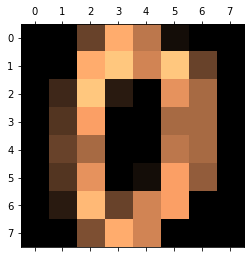

In [12]:
# Existem outros formatos, se quiser mudar
# Para mais informações, consulte https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html 

plt.copper()
plt.matshow(digitosCarregados.images[0])

<Figure size 432x288 with 0 Axes>

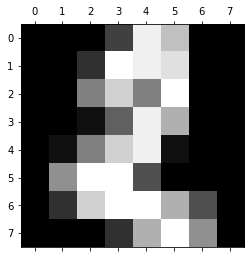

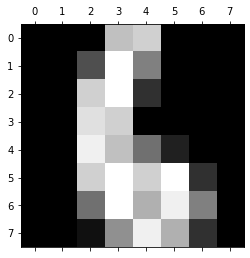

In [13]:
# Vamos trabalhar com escala de cinza. Vamos ver algumas imagens variadas

plt.gray()
plt.matshow(digitosCarregados.images[2])
plt.matshow(digitosCarregados.images[6])

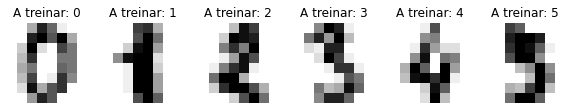

In [16]:
# Também podemos colocar imagens lado a lado. Não é obrigatório, mas facilita a visualização.
# Existem várias formas de fazer isso, a seguir coloco uma delas.
# Desafio - Explicar como funciona essa estrutura

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, digitosCarregados.images, digitosCarregados.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("A treinar: %i" % label)

In [17]:
# Bem, agora que já demos uma explorada na base, vamos modelar
# Queremos classificar os números corretamente

numeroDeAmostras = len(digitosCarregados.images)
print('O número de amostras e: ', numeroDeAmostras)
print('O shape das imagens inicialmente era de: ', digitosCarregados.images.shape)

O número de amostras e:  1797
O shape das imagens inicialmente era de:  (1797, 8, 8)


In [18]:
# Fazendo um reshape nos dados
# Maiores informações sobre o método, podem ser encontradas aqui
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

data = digitosCarregados.images.reshape((numeroDeAmostras, -1))
print('O shape dos dados agora é: ', data.shape)

O shape dos dados agora é:  (1797, 64)


In [19]:
# Vamos criar um classificador, usando uma máquina de vetores de suporte (SVM)
# É um a técnica de aprendizado supervisionado
# A idéia essencial dessa abordagem, é conseguir encontrar um hiperplano que consiga
# separar classes distintas.
# O sklearn já possui uma biblioteca implementada nesse sentido, que é a svm
# Mais detalhes podem ser encontrados aqui https://scikit-learn.org/stable/modules/svm.html
# Outro link bacana é o https://scikit-learn.org/stable/modules/svm.html#svm

from sklearn import svm
classificador = svm.SVC(gamma=0.001)

In [20]:
"""
Para poder fazer nosso treinamento, vamos dividir o conjunto em conjunto de treinamento
e conjunto de testes. Vamos estudar os efeitos da proporção. 
A biblioteca que teremos de importar é a 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""

from sklearn.model_selection import train_test_split

In [41]:
"""
Inicialmente nosso conjunto de testes terá 50% dos dados (test_size = 0.5). 
Cada equipe vai variar esse valor, e estudar os impactos dessa variação.
"""
X_train, X_test, y_train, y_test = train_test_split(
    data, digitosCarregados.target, test_size=0.5, shuffle=False
)
print('O conjunto de treinamento tem um shape de: ', X_train.shape)
print('O conjunto de testes tem um shape de     : ', X_test.shape)

O conjunto de treinamento tem um shape de:  (898, 64)
O conjunto de testes tem um shape de     :  (899, 64)


In [24]:
# O y de treino, está associado ao target. Ou seja, temos o gabarito de todas 
# as imagens, sabemos qual é a resposta que deveria ser dada. 
# Vamos ver como ele é?

y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
       4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2,
       8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,

In [36]:
# Chegou a hora de aprender com os dados. Vamos usar o metodo
# fit do classificador que criamos
# Olha que bacana, só essa linha já faz o treinamento

classificador.fit(X_train, y_train)

SVC(gamma=0.001)

In [37]:
# Agora vamos prever os valores do conjunto de testes, usando o metodo
# predict

previsoes = classificador.predict(X_test)
previsoes

array([3, 6, 9, ..., 8, 9, 8])

In [38]:
print('A previsao para o elemento 45 do conjunto de teste é : ', previsoes[45])
print('O resultado para o elemento 45 do conjunto de teste é: ', y_test[45])

A previsao para o elemento 45 do conjunto de teste é :  8
O resultado para o elemento 45 do conjunto de teste é:  8


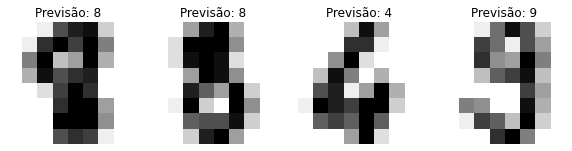

In [29]:
# Opcional, podemos organizar as imagens de outra forma e dar uma olhadinha...
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, previsoes):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Previsão: {prediction}")

In [30]:
# Não podemos ver cada imagem individualmente, precisamos gerar relatórios
# para fornecer os "big numbers". Para isso vamos usar algumas métricas
# disponíveis em https://scikit-learn.org/stable/modules/model_evaluation.html
# Outro link bacana é o https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn import metrics

In [31]:
# Agora vamos gerar o relatório das classificações (50%)
print(
    f"Relatório de classificação por classificador {classificador}:\n"
    f"{metrics.classification_report(y_test, previsoes)}\n"
)

Relatório de classificação por classificador SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [39]:
# Agora vamos gerar o relatório das classificações (20% de treinamento)
print(
    f"Relatório de classificação por classificador {classificador}:\n"
    f"{metrics.classification_report(y_test, previsoes)}\n"
)

Relatório de classificação por classificador SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438




In [32]:
# Para entender as classificações da tabela acima, precisamos ver 
# https://scikit-learn.org/stable/modules/model_evaluation.html
# Um outro material bacana é o 
# https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

Matrix de Confusão:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


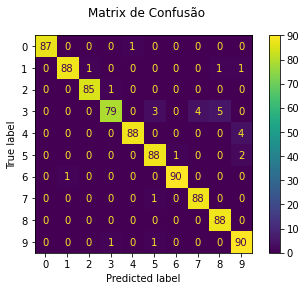

In [33]:
# Agora vamos estudar a matriz de confusão
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, previsoes)
disp.figure_.suptitle("Matrix de Confusão")
print(f"Matrix de Confusão:\n{disp.confusion_matrix}")
plt.show()

In [34]:
disp.confusion_matrix.shape

(10, 10)

Matrix de Confusão:
[[139   0   0   0   1   0   0   0   0   0]
 [  0 105  18   0   0   1   4   0  13   3]
 [  0   0 131   2   0   0   0   0   0   8]
 [  0   0   2 110   0   3   0   2   4  24]
 [  0   0   0   0 142   0   0   1   0   4]
 [  0   0   0   0   2 134   1   0   0   9]
 [  2   1   0   0   0   0 139   0   3   0]
 [  0   0   0   0   0   0   0 131   1  12]
 [  0   3   2   0   0   1   0   0 122  12]
 [  0   8   0   0   0   1   0   2   2 133]]


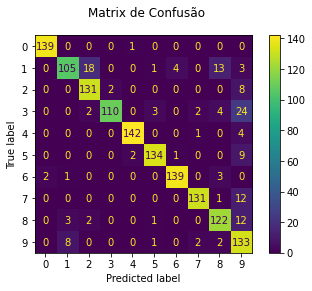

In [40]:
# Agora vamos estudar a matriz de confusão (20% para treinamento)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, previsoes)
disp.figure_.suptitle("Matrix de Confusão")
print(f"Matrix de Confusão:\n{disp.confusion_matrix}")
plt.show()